<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-Setup" data-toc-modified-id="Python-Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python Setup</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data</a></span></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Analysis</a></span><ul class="toc-item"><li><span><a href="#Get-a-count-of-POS-per-document" data-toc-modified-id="Get-a-count-of-POS-per-document-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Get a count of POS per document</a></span></li><li><span><a href="#Get-patents-above-0.5-according-to-CD-index" data-toc-modified-id="Get-patents-above-0.5-according-to-CD-index-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Get patents above 0.5 according to CD index</a></span></li><li><span><a href="#Get-patents-below-0.5-according-to-CD-index" data-toc-modified-id="Get-patents-below-0.5-according-to-CD-index-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Get patents below 0.5 according to CD index</a></span></li><li><span><a href="#Make-sure-we-are-comparing-the-same-amount-of-data" data-toc-modified-id="Make-sure-we-are-comparing-the-same-amount-of-data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Make sure we are comparing the same amount of data</a></span></li><li><span><a href="#Compare-the-use-of-parts-of-speech" data-toc-modified-id="Compare-the-use-of-parts-of-speech-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Compare the use of parts of speech</a></span><ul class="toc-item"><li><span><a href="#Totals:-Above-zero-have-more-verbs-and-adverbs,-below-zero-have-more-nouns-and-adjectives" data-toc-modified-id="Totals:-Above-zero-have-more-verbs-and-adverbs,-below-zero-have-more-nouns-and-adjectives-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Totals: Above zero have more <em>verbs</em> and <em>adverbs</em>, below zero have more <em>nouns</em> and <em>adjectives</em></a></span></li><li><span><a href="#Order-of-POS-tags" data-toc-modified-id="Order-of-POS-tags-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Order of POS tags</a></span></li><li><span><a href="#Most-common-words/difference-in-words" data-toc-modified-id="Most-common-words/difference-in-words-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Most common words/difference in words</a></span></li></ul></li></ul></li></ul></div>

## Python Setup

In [1]:
import pandas as pd
from collections import Counter

# Visualization

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

## Import Data

In [ ]:
document_attributes = pd.read_csv('document_attributes.csv', header=None)
document_attributes_with_title_tokens = pd.read_csv('document_attributes_with_title_tokens.csv',error_bad_lines=False, header=None)

In [ ]:
document_title_tokens = pd.read_csv('document_title_tokens.csv',error_bad_lines=False,header=None)

## Exploratory Analysis

### Get a count of POS per document

In [6]:
groupby = document_title_tokens.groupby([0,4]).size().unstack(fill_value=0)

In [44]:
groupby.head()

4,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NNS,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SPACE,SYM,VERB,X
0,,,,,,,,,,,,,,,,,,,
a10236051,3,2,0,0,0,1,0,0,1,0,0,0,4,0,0,0,0,0,0
a10385619,0,1,0,0,1,1,0,0,2,0,0,0,6,1,0,0,0,0,0
a10451881,0,1,0,0,0,1,0,0,4,0,0,0,3,1,0,0,0,0,0
a10586241,1,2,0,0,0,1,0,0,1,1,0,0,6,1,0,0,0,0,0
a10692008,2,1,0,0,0,2,0,0,1,0,0,0,3,1,0,0,0,0,0


### Get patents above 0.5 according to CD index

In [47]:
above_zero = document_attributes_with_title_tokens[document_attributes_with_title_tokens[8] > '0.5']

In [48]:
above_zero_counts = above_zero.groupby([0,14]).size().unstack(fill_value=0)

In [49]:
above_zero_counts.head()

14,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SPACE,SYM,VERB,X
0,,,,,,,,,,,,,,,,,,
a10692008,2,1,0,0,0,2,0,1,0,0,0,3,1,0,0,0,0,0
a1137053,0,3,0,0,0,2,0,2,1,0,0,2,0,0,0,0,0,0
a1182038,0,0,0,0,1,1,0,0,1,0,0,4,1,0,0,0,0,0
a12384500,2,2,0,0,1,1,0,8,0,0,0,0,3,0,0,0,2,1
a12532433,0,0,0,0,1,0,0,1,0,0,0,3,2,0,0,0,0,0


### Get patents below 0.5 according to CD index

In [50]:
below_zero = document_attributes_with_title_tokens[document_attributes_with_title_tokens[8] < '0.5']

In [51]:
below_zero_counts = below_zero.groupby([0,14]).size().unstack(fill_value=0)

In [52]:
below_zero_counts.head()

14,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NNS,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SPACE,SYM,VERB,X
0,,,,,,,,,,,,,,,,,,,
a10236051,3,2,0,0,0,1,0,0,1,0,0,0,4,0,0,0,0,0,0
a10385619,0,1,0,0,1,1,0,0,2,0,0,0,6,1,0,0,0,0,0
a10451881,0,1,0,0,0,1,0,0,4,0,0,0,3,1,0,0,0,0,0
a10586241,1,2,0,0,0,1,0,0,1,1,0,0,6,1,0,0,0,0,0
a10870219,0,2,0,0,0,0,0,0,2,0,0,0,3,0,0,0,0,1,0


### Make sure we are comparing the same amount of data

In [57]:
below_zero_counts = below_zero_counts.reset_index()

In [58]:
above_zero_counts = above_zero_counts.reset_index()

In [59]:
# Check the number of patents in above zero

above_zero_counts[0].nunique()

240296

In [60]:
# Check the number of patents in below zero

below_zero_counts[0].nunique()

1752835

In [61]:
# Make below zero the same amount as above zero

below_zero_counts = below_zero_counts.head(240296)

In [62]:
below_zero_counts[0].nunique()

240296

### Compare the use of parts of speech

In [85]:
below_zero_counts.loc['Total',:]= below_zero_counts.sum(axis=0)

In [91]:
below_zero_total = below_zero_counts.loc['Total'].reset_index()[2:]

In [92]:
above_zero_counts.loc['Total',:]= above_zero_counts.sum(axis=0)

In [93]:
above_zero_total = above_zero_counts.loc['Total'].reset_index()[2:]

In [96]:
below_zero_total = below_zero_total.rename(columns={14:'POS','Total':'Total_Below_Zero'})
above_zero_total = above_zero_total.rename(columns={14:'POS','Total':'Total_Above_Zero'})

In [99]:
merged_total = above_zero_total.merge(below_zero_total,on='POS')

In [102]:
merged_total['Total_Below_Zero'] = merged_total['Total_Below_Zero'].astype(int)

#### Totals: Above zero have more _verbs_ and _adverbs_, below zero have more _nouns_ and _adjectives_

In [105]:
merged_total.sort_values('Total_Above_Zero',ascending=False)

,POS,Total_Above_Zero,Total_Below_Zero
7,NOUN,963058,1245482
1,ADP,330588,523519
11,PROPN,297603,427551
0,ADJ,276056,383815
16,VERB,173285,134356
12,PUNCT,160213,349081
5,DET,118727,179866
4,CCONJ,101289,123160
2,ADV,19184,15055
8,NUM,18696,35844


#### Order of POS tags

In [108]:
above_zero_groupby = above_zero.groupby(0)[14].apply(list).reset_index()

In [109]:
below_zero_groupby = below_zero.groupby(0)[14].apply(list).reset_index()

In [111]:
above_zero_groupby[0].nunique()

240296

In [114]:
below_zero_groupby[0].nunique()

240296

In [113]:
below_zero_groupby = below_zero_groupby.head(240296)

In [116]:
def convert_to_tuple(row):
    updated = tuple(row)
    return updated

above_zero_groupby[14] = above_zero_groupby[14].apply(convert_to_tuple)
below_zero_groupby[14] = below_zero_groupby[14].apply(convert_to_tuple)

In [117]:
above_zero_pos_patterns = above_zero_groupby.groupby(14).size().reset_index()

In [118]:
below_zero_pos_patterns = below_zero_groupby.groupby(14).size().reset_index()

In [119]:
above_zero_pos_patterns = above_zero_pos_patterns.rename(columns={0:'above_zero'})

In [120]:
below_zero_pos_patterns = below_zero_pos_patterns.rename(columns={0:'below_zero'})

In [121]:
merged_pos_patterns = above_zero_pos_patterns.merge(below_zero_pos_patterns,on=14)

In [124]:
merged_pos_patterns.sort_values('above_zero',ascending=False)

,14,above_zero,below_zero
5152,"(NOUN, NOUN)",5333,52
5752,"(NOUN, NOUN, NOUN)",4587,42
1341,"(ADJ, NOUN, NOUN)",4124,140
365,"(ADJ, NOUN)",2735,92
1622,"(ADJ, NOUN, NOUN, NOUN)",2028,38
8065,"(VERB, NOUN)",1442,21
5930,"(NOUN, NOUN, NOUN, NOUN)",1368,14
6929,"(PROPN, NOUN)",1304,47
6567,"(NOUN, VERB, NOUN)",1083,5
3193,"(NOUN,)",1025,24


In [123]:
merged_pos_patterns.sort_values('below_zero',ascending=False)

,14,above_zero,below_zero
436,"(ADJ, NOUN, ADP, ADJ, NOUN)",322,277
907,"(ADJ, NOUN, ADP, NOUN, NOUN)",358,233
515,"(ADJ, NOUN, ADP, ADJ, NOUN, NOUN)",179,155
3281,"(NOUN, ADP, ADJ, NOUN)",443,143
1341,"(ADJ, NOUN, NOUN)",4124,140
807,"(ADJ, NOUN, ADP, NOUN)",285,124
5186,"(NOUN, NOUN, ADP, ADJ, NOUN)",371,124
5459,"(NOUN, NOUN, ADP, NOUN, NOUN)",518,111
402,"(ADJ, NOUN, ADP, ADJ, ADJ, NOUN)",56,99
1360,"(ADJ, NOUN, NOUN, ADP, ADJ, NOUN)",179,96


#### Most common words/difference in words

In [126]:
# Get all nouns

above_zero_nouns = above_zero[above_zero[14] == 'NOUN']

In [127]:
# Count of unique nouns

count_above_zero_nouns = Counter(above_zero_nouns[13])
count_above_zero_nouns.most_common()

[('method', 33101),
 ('apparatus', 17495),
 ('system', 16603),
 ('device', 15426),
 ('process', 10260),
 ('control', 5721),
 ('composition', 5370),
 ('effect', 5096),
 ('cell', 5058),
 ('use', 4590),
 ('image', 4109),
 ('material', 4064),
 ('study', 3898),
 ('structure', 3793),
 ('acid', 3778),
 ('analysis', 3724),
 ('circuit', 3453),
 ('preparation', 3426),
 ('compound', 3277),
 ('production', 3266),
 ('derivative', 3182),
 ('machine', 3153),
 ('assembly', 2858),
 ('type', 2808),
 ('treatment', 2766),
 ('power', 2732),
 ('display', 2727),
 ('patient', 2726),
 ('water', 2723),
 ('model', 2720),
 ('semiconductor', 2624),
 ('metal', 2555),
 ('gas', 2555),
 ('vehicle', 2514),
 ('surface', 2418),
 ('network', 2415),
 ('datum', 2373),
 ('property', 2311),
 ('application', 2265),
 ('communication', 2257),
 ('film', 2231),
 ('mechanism', 2099),
 ('pressure', 2002),
 ('protein', 1970),
 ('-', 1951),
 ('element', 1951),
 ('detection', 1948),
 ('processing', 1942),
 ('time', 1914),
 ('case', 187

In [128]:
below_zero_nouns = below_zero[below_zero[14] == 'NOUN']
count_below_zero_nouns = Counter(below_zero_nouns[13])
count_below_zero_nouns.most_common()

[('method', 265967),
 ('system', 159054),
 ('apparatus', 121731),
 ('device', 116471),
 ('effect', 59259),
 ('cell', 55350),
 ('process', 43193),
 ('control', 41553),
 ('study', 39664),
 ('structure', 38742),
 ('analysis', 33616),
 ('image', 31900),
 ('model', 28250),
 ('circuit', 28081),
 ('use', 27681),
 ('patient', 27672),
 ('composition', 27105),
 ('datum', 26868),
 ('semiconductor', 24943),
 ('property', 23168),
 ('assembly', 22674),
 ('material', 22393),
 ('surface', 22378),
 ('type', 22046),
 ('protein', 21915),
 ('network', 21767),
 ('film', 21655),
 ('treatment', 21491),
 ('power', 21403),
 ('acid', 21158),
 ('memory', 20074),
 ('synthesis', 19805),
 ('vehicle', 19212),
 ('application', 19146),
 ('processing', 18831),
 ('display', 18760),
 ('phase', 18412),
 ('water', 18338),
 ('communication', 18002),
 ('detection', 17469),
 ('activity', 17229),
 ('time', 17226),
 ('-', 17184),
 ('factor', 16958),
 ('production', 16805),
 ('signal', 16713),
 ('temperature', 16640),
 ('gas', 1

In [129]:
# A list of unique nouns

set_above_zero_nouns = list(set(above_zero_nouns[13]))
set_below_zero_nouns = list(set(below_zero_nouns[13]))

difference_nouns_in_above_zero = list(set(set_above_zero_nouns) - set(set_below_zero_nouns))
difference_nouns_in_below_zero = list(set(set_below_zero_nouns) - set(set_above_zero_nouns))

In [130]:
difference_nouns_in_below_zero 

['writ',
 'paromomycine',
 'affricate',
 'phyto',
 'spatiotopic',
 'PSEUDOHALIDOHEPTASULFUR(+1',
 'esprit',
 'converison',
 'leaning',
 'emberizine',
 'solubiltie',
 'lysocline',
 'pxo1',
 'loperamide',
 'pam3cys',
 'tyrrs(apm',
 'para+-gaas',
 'unsoldering',
 'RE213',
 'zrco2si2',
 'ppcmatrix',
 'volcanology',
 'obliquities',
 'ce1-xybxcoin5',
 'coagulopathie',
 'DISPERSAL',
 'm(c6h5nh3)(4)p(6)o(18)(.)8h(2)o',
 'accelerant',
 'monacanthid',
 'attaching',
 'hypereutrophic',
 'biscitraconimide',
 'hydroxytetradecatrienoic',
 'ethyldithiocarbamato)di',
 'palliation',
 'cgp36742',
 'DORNROSCHEN',
 'lu-177',
 'transferrability',
 'er100s-1',
 'tropopause',
 'polyphosphoric',
 '3323D',
 'belligerence',
 'desulphurize',
 'whisper',
 'strumming',
 'orchardgras',
 'EtO)(2)POP(OEt)(2',
 'pecoma',
 'mircornas',
 'housewrap',
 'la3',
 'hysterosonography',
 'lycia',
 'NPNa',
 'imperatorin',
 'arrhiza',
 'PYLOROPLASTY',
 '8-frame',
 'mineralized',
 'counterfeiting',
 'butyl-5',
 'cx516',
 'isoflava

In [131]:
difference_nouns_in_above_zero

['boimpy',
 'W-230',
 'halotriazine',
 'Co2Si',
 'unique',
 'extremizer',
 'triazolylalkyl-',
 'al100-xmnx',
 'propanedioate',
 'bifolding',
 'recitative',
 'mwananchi',
 'breadfruit',
 'historicisation',
 'teratonymy',
 'washpipe',
 'organoiodide',
 'ergothioneine',
 'benz[f]-2,5-oxazocines',
 'haematocep',
 'a(x)fe(2-y)se(2',
 'cyclopentadithiophene',
 'x022',
 'gnss-2',
 'cabaret',
 'bodyshop',
 'yangchunensis',
 'atp-30',
 'riograndensi',
 'benzyl-3-pyrrolidinol',
 'lunotriquetral',
 'multicatheter',
 'isosuperatom',
 'practioner',
 'imidazo[4,5-d]pyridazin-4-one',
 'dy(2',
 'oxasteroid',
 'h(t)/h(x',
 'exergame',
 'ipc',
 'pyrano-(3,2-g',
 'tolerant',
 'coccidian',
 'mesocarnivore',
 'gyrogonite',
 "butyl-4'-hydroxyphenyl)ethenyl]pyridine",
 'autoconverter',
 'peridot',
 'indol-1-yl)-2-(amino)acetamide',
 'dimethylhydrazine',
 'relfection',
 'cryptica',
 'receptance',
 'catchbasin',
 'stemming',
 'imidazol-1-yl)alkyl]-arylamide',
 'butylether',
 'assignee',
 '.alpha.-aryl-.alpha',

In [132]:
# Get all adjectives

above_zero_adj = above_zero[above_zero[14] == 'ADJ']
below_zero_adj = below_zero[below_zero[14] == 'ADJ']

In [133]:
# Count of unique adjectives

count_above_zero_adj = Counter(above_zero_adj[13])
count_above_zero_adj.most_common()

[('-', 7624),
 ('same', 5221),
 ('high', 5017),
 ('optical', 2981),
 ('new', 2461),
 ('low', 2416),
 ('non', 2055),
 ('magnetic', 2000),
 ('multi', 1825),
 ('liquid', 1734),
 ('human', 1623),
 ('electronic', 1548),
 ('electrical', 1451),
 ('like', 1408),
 ('automatic', 1408),
 ('multiple', 1407),
 ('single', 1305),
 ('thermal', 1292),
 ('organic', 1265),
 ('novel', 1263),
 ('light', 1231),
 ('electric', 1160),
 ('anti', 1157),
 ('solid', 1147),
 ('internal', 1107),
 ('different', 1063),
 ('dynamic', 1014),
 ('current', 1000),
 ('active', 998),
 ('free', 963),
 ('thin', 963),
 ('wireless', 926),
 ('continuous', 907),
 ('mobile', 899),
 ('large', 856),
 ('digital', 855),
 ('variable', 851),
 ('mechanical', 834),
 ('rotary', 829),
 ('dimensional', 826),
 ('composite', 819),
 ('clinical', 815),
 ('double', 801),
 ('experimental', 799),
 ('dual', 789),
 ('small', 783),
 ('long', 754),
 ('aqueous', 749),
 ('fluid', 740),
 ('structural', 739),
 ('early', 733),
 ('molecular', 728),
 ('resistan

In [134]:
count_below_zero_adj = Counter(below_zero_adj[13])
count_below_zero_adj.most_common()

[('-', 60252),
 ('high', 39802),
 ('same', 32602),
 ('optical', 27775),
 ('low', 22371),
 ('human', 21099),
 ('magnetic', 18622),
 ('new', 17503),
 ('non', 17410),
 ('multi', 15777),
 ('electronic', 15554),
 ('multiple', 14894),
 ('single', 13295),
 ('liquid', 12625),
 ('electrical', 10729),
 ('different', 10611),
 ('thermal', 10055),
 ('novel', 10007),
 ('thin', 9823),
 ('molecular', 9682),
 ('light', 9140),
 ('dimensional', 9110),
 ('solid', 9087),
 ('dynamic', 8999),
 ('automatic', 8310),
 ('digital', 8213),
 ('internal', 8182),
 ('organic', 8142),
 ('clinical', 8090),
 ('like', 7923),
 ('free', 7872),
 ('dependent', 7791),
 ('active', 7774),
 ('long', 7665),
 ('structural', 7553),
 ('current', 7214),
 ('functional', 7202),
 ('electric', 7173),
 ('large', 7156),
 ('early', 6972),
 ('small', 6896),
 ('anti', 6806),
 ('experimental', 6780),
 ('specific', 6774),
 ('dual', 6656),
 ('mobile', 6424),
 ('variable', 6384),
 ('selective', 6369),
 ('mechanical', 6175),
 ('composite', 6120),
 

In [135]:
# A list of unique adjectives

set_above_zero_adj = list(set(above_zero_adj[13]))
set_below_zero_adj = list(set(below_zero_adj[13]))

difference_adj_in_above_zero = list(set(set_above_zero_adj) - set(set_below_zero_adj))
difference_adj_in_below_zero = list(set(set_below_zero_adj) - set(set_above_zero_adj))

In [136]:
difference_adj_in_above_zero

['cd7-specific',
 'photothermoplastic',
 'aerochemical',
 '5-nitrofurfural',
 'spanglish',
 'phyllophagous',
 'tim-3',
 'kallikrein',
 'fluoroaromatic',
 'antiseborrheic',
 'brane',
 'piperidin-4-yl',
 'salmosin',
 'n-(pyrrolidonyalkyl)-n',
 'atomizing',
 'thioalkenylphosphonic',
 'coprophilic',
 'lofted',
 'bioxanthracene',
 'glucocorticoid',
 'hash',
 'mgcumn',
 'buckle',
 '6-hydroxy',
 'portless',
 'immunoenzyme',
 'instinctual',
 'argricultural',
 'grafted',
 'commanding',
 'C3A',
 'deadband',
 'bind',
 'spiralled',
 'dodecametal',
 'neurotrophin-3-deficient',
 'tio2-decorated',
 'piperoofed',
 'jobless',
 'hawkish',
 'psoriasin',
 'fluoralkylphosphonic',
 'perspirative',
 'nad(+)-dependent',
 'nonflat',
 '2-microlocal',
 '2-aminoquinoline',
 'iminomethyl',
 'smartphone',
 'acylhydroxamic',
 'allergic-3-carboxy',
 'autogenetic',
 'dosable',
 'overdrawn',
 'thiazolothiazole',
 'holiday',
 'immunobodulatory',
 'oxide@sio2',
 'perhaloarene',
 'gyrolaminary',
 'portomesenteic',
 'lufeo

In [137]:
difference_adj_in_below_zero

['subcode',
 'oligoacene',
 'technique',
 '21-halo',
 'surficial',
 'aganglionic',
 '2-heteroaryliumaliphatic',
 'multidialectal',
 'biohazard',
 'loperamide',
 'multislit',
 'tombstoning',
 'sternopleural',
 'differentiator',
 'clamp',
 'salubrious',
 'coping',
 'flexgrid',
 'mannerist',
 '2-class',
 'ptcr',
 'dimethylphosphonamidic',
 'macrocrystalline',
 'artisanal',
 'repositional',
 'cowlside',
 'hypereutrophic',
 'rice',
 'thyromimetic',
 'progenetic',
 'demountale',
 'disprivileged',
 'echinocandin',
 'poly[2-(methacryloyloxy)ethylphosphorylcholine]-coated',
 'waterbound',
 'tropopause',
 'oac-',
 'ktr1p',
 '320-row',
 'cyclodestructive',
 'exofacial',
 'bi3.15nd0.85ti3o12',
 'laplace',
 'acousto',
 'unswept',
 'defect',
 'suprascapular',
 'oestrus',
 '4-dedimethylaminotetracycline',
 'optothermomechanical',
 'agglomerable',
 'defendable',
 'pressor',
 'endomyocardial',
 'sars',
 'smirnov',
 'tetrahydrobenzo[b]pyran',
 'transmodal',
 '3-methylpyridine',
 'canaanite',
 'poly(2-et

In [138]:
# Get all verbs

above_zero_verb = above_zero[above_zero[14] == 'VERB']
below_zero_verb = below_zero[below_zero[14] == 'VERB']

In [139]:
# Count of unique verbs

count_above_zero_verb = Counter(above_zero_verb[13])
count_above_zero_verb.most_common()

[('use', 9423),
 ('base', 5502),
 ('have', 4437),
 ('produce', 3640),
 ('contain', 3040),
 ('form', 2859),
 ('make', 2588),
 ('control', 2517),
 ('manufacture', 2113),
 ('prepare', 2062),
 ('induce', 1764),
 ('improve', 1652),
 ('treat', 1446),
 ('measure', 1355),
 ('reduce', 1321),
 ('include', 1142),
 ('drive', 1115),
 ('enhance', 1067),
 ('associate', 1060),
 ('substitute', 1054),
 ('detect', 1027),
 ('comprise', 1015),
 ('integrate', 995),
 ('determine', 927),
 ('modify', 902),
 ('provide', 896),
 ('mount', 841),
 ('relate', 831),
 ('increase', 808),
 ('support', 801),
 ('operate', 788),
 ('emit', 785),
 ('fabricate', 729),
 ('generate', 716),
 ('switch', 679),
 ('mean', 676),
 ('couple', 675),
 ('record', 672),
 ('combine', 662),
 ('derive', 649),
 ('regulate', 601),
 ('inhibit', 600),
 ('prevent', 583),
 ('cool', 571),
 ('bind', 563),
 ('utilize', 560),
 ('cut', 550),
 ('mediate', 548),
 ('lock', 548),
 ('predict', 544),
 ('identify', 544),
 ('develop', 533),
 ('promote', 502),
 

In [140]:
count_below_zero_verb = Counter(below_zero_verb[13])
count_below_zero_verb.most_common()

[('use', 78447),
 ('base', 42227),
 ('have', 35922),
 ('induce', 21343),
 ('control', 21008),
 ('form', 20676),
 ('produce', 17662),
 ('contain', 16184),
 ('make', 15444),
 ('manufacture', 13470),
 ('reduce', 12458),
 ('improve', 11632),
 ('associate', 11203),
 ('integrate', 11150),
 ('include', 10455),
 ('provide', 9413),
 ('measure', 9086),
 ('detect', 8969),
 ('enhance', 8869),
 ('treat', 8766),
 ('relate', 8111),
 ('determine', 8093),
 ('increase', 8083),
 ('prepare', 7611),
 ('drive', 7587),
 ('mediate', 7041),
 ('generate', 7027),
 ('comprise', 7001),
 ('bind', 6927),
 ('modify', 6900),
 ('mount', 6006),
 ('fabricate', 5965),
 ('couple', 5866),
 ('record', 5823),
 ('support', 5815),
 ('derive', 5691),
 ('switch', 5366),
 ('regulate', 5330),
 ('follow', 5284),
 ('activate', 5206),
 ('operate', 5183),
 ('emit', 5127),
 ('combine', 5091),
 ('monitor', 4536),
 ('predict', 4510),
 ('utilize', 4491),
 ('inhibit', 4449),
 ('process', 4322),
 ('distribute', 4272),
 ('affect', 4034),
 ('p

In [141]:
# A list of unique verbs

set_above_zero_verb = list(set(above_zero_verb[13]))
set_below_zero_verb = list(set(below_zero_verb[13]))

difference_verb_in_above_zero = list(set(set_above_zero_verb) - set(set_below_zero_verb))
difference_verb_in_below_zero = list(set(set_below_zero_verb) - set(set_above_zero_verb))

In [142]:
difference_verb_in_above_zero

['TfoX',
 'f(r)-gravity',
 'poly(unsaturate',
 'androscovitine',
 'hyperinflate',
 'dolomitize',
 'sirt1-mediate',
 'congolensi',
 'RETURN',
 'ATCC17023',
 'u)se',
 'toldensi',
 'celastri',
 'cokrige',
 'hyperelastic',
 '5&#x2032;-labele',
 'clinic',
 'health',
 'wins',
 'caveolin-1-mediate',
 'taine',
 'LiA[N(CN)(2)](2',
 'TrCP-1',
 'prepivote',
 'auralize',
 'sealant',
 'defoule',
 'vibromixe',
 'multifurcate',
 'minigarden',
 'denominate',
 'sub.1C',
 'pro1159',
 'earthquake',
 'casehardene',
 'interiorize',
 'overhaul',
 'scincoide',
 'transcriptomic',
 'b23-binde',
 'DRM-600',
 'instanton',
 'needlepointe',
 'reradiate',
 'n2o)-emitte',
 'photodeposite',
 'cryptanalyze',
 'aspiration',
 're-)constructe',
 'packete',
 'pubiflora',
 'legitimise',
 'anticlumpe',
 'oxacephalosporin',
 'labile',
 'nodularize',
 'ribofuranosyl)pyrrolo[4,3,2-de]pyrimido[4,5',
 'dCas9',
 'sprue',
 'delamination',
 'subgenu',
 'naip5-mediate',
 'degraded',
 'ethynylate',
 'tensorize',
 'butene',
 'GaInSn',

In [143]:
difference_verb_in_below_zero

['pyrrolidine',
 nan,
 'cofractionate',
 'subterahertz',
 'tetrasulphonate',
 'gatekeepe',
 'progressively',
 'caregive',
 'olivocochlear',
 'throughplate',
 'technique',
 'zig',
 'certificate',
 'underflow',
 'P450IA',
 'wth',
 'cftr)-processe',
 'prephosphate',
 'fluorohydroxyapatite',
 'Sequelae',
 'multislit',
 'polyfunctional',
 'pbx1-couple',
 'underdrain',
 'early',
 'striate',
 'ford',
 'electroporate',
 'S100PBP',
 'peg)-induce',
 'bisalkylate',
 'orthocarboxylate',
 'supergravitie',
 'silt',
 '-bipyridine',
 'overtreate',
 'lipopolysaccharideinduce',
 'osteomyelitis',
 'ascochyta',
 'butadiene',
 'underlay',
 'infructescence',
 'bioconverte',
 'r)-3-hydroxybutyrate',
 'nanolayere',
 'fe(iii)-containe',
 'desulphurize',
 'complementariness',
 'citation',
 '5-membere',
 'specimen',
 'sonnei',
 'subscanne',
 'Cyp1A',
 'nonremodele',
 'sh3bp2-encode',
 'autofocus',
 'insufflate',
 'amarali',
 'terahertz',
 'riograndensi',
 'ranging',
 'mistargete',
 'decresii',
 'Bitboard',
 'epi

In [163]:
with open('above_zero_verbs.txt', 'w') as file:
    for i in difference_verb_in_above_zero:
        file.write(i + '\n')

In [165]:
with open('below_zero_verbs.txt', 'w') as file:
    for i in difference_verb_in_below_zero:
        file.write(str(i) + '\n')

(-0.5, 399.5, 199.5, -0.5)

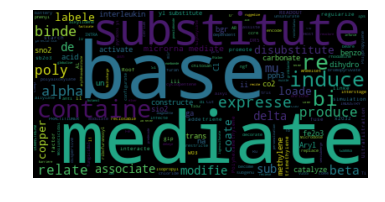

In [171]:
verb_above_zero = ' '.join(difference_verb_in_above_zero)
wordcloud = WordCloud().generate(verb_above_zero)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [178]:
difference_verb_in_below_zero = list(filter(None, difference_verb_in_below_zero))

In [181]:
updated = []
for i in difference_verb_in_below_zero:
    if type(i) == str:
        updated.append(i)

(-0.5, 399.5, 199.5, -0.5)

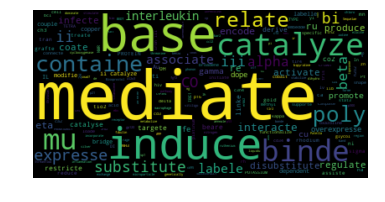

In [183]:
verb_below_zero = ' '.join(updated)
wordcloud = WordCloud().generate(verb_below_zero)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")